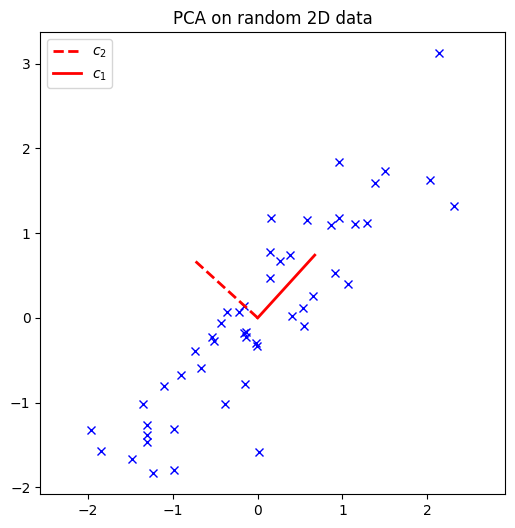

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- center input dataset ----------
def center(X, P):
    """
    X: shape (P, N)  where P = #points, N = #dimensions
    return: centered X, shape same as X
    """
    X_means = np.mean(X, axis=0)                     # (N,)
    X_centered = X - np.repeat(X_means.reshape(1,-1), P, axis=0) # np.repeat
    return X_centered


# ---------- compute Principal Components ----------
def compute_pcs(X, lam, P):
    """
    X: centered X
    lam: small constant to stabilize covariance
    P: #points
    return: eigenvalues D, eigenvectors V (columns)
    """
    Cov = 1/P * np.dot(X.T, X) + lam * np.eye(X.shape[1]) # \frac{1}{P}XX^T
    D, V = np.linalg.eigh(Cov)         # eigh for symmetric matrix
    return D, V


# ---------- Test with random data ----------
P = 50      # number of points
N = 2       # dimensions

# make random correlated data
x1 = np.random.randn(P, 1)
x2 = x1 + 0.5 * np.random.randn(P, 1)

# stack into shape (P,2)
X = np.append(x1, x2, axis=1)

# center X
X = center(X, P)

# plot raw points
plt.figure(figsize=(6,6))
plt.plot(X[:,0], X[:,1], 'xb')

# compute PCs
D, V = compute_pcs(X, lam=0.001, P=P)

# plot principal directions (scaled for visibility)
origin = np.array([[0,0],[0,0]])
plt.plot([0, V[0,0]],[0, V[1,0]], 'r--', linewidth=2, label='$c_2$')
plt.plot([0, V[0,1]],[0, V[1,1]], 'r', linewidth=2,label='$c_1$')
plt.legend()
plt.axis('equal')
plt.title("PCA on random 2D data")
plt.show()
